In [1]:
import networkx as nx
import numpy as np
import itertools

import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))

#nodes: 34 and #edges: 78


In [3]:
node_to_degrees = sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)

## view the top 5,
node_to_degrees[:5]

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

In [4]:
## calculate degree centrality,
closeness_centrality = nx.closeness_centrality(G)

## set degree centrality metrics on each node,
nx.set_node_attributes(G, closeness_centrality, 'cc')

sorted(G.nodes(data=True), key = lambda x: x[1]['cc'], reverse=True)

[(0, {'cc': 0.5689655172413793, 'club': 'Mr. Hi'}),
 (2, {'cc': 0.559322033898305, 'club': 'Mr. Hi'}),
 (33, {'cc': 0.55, 'club': 'Officer'}),
 (31, {'cc': 0.5409836065573771, 'club': 'Officer'}),
 (8, {'cc': 0.515625, 'club': 'Mr. Hi'}),
 (13, {'cc': 0.515625, 'club': 'Mr. Hi'}),
 (32, {'cc': 0.515625, 'club': 'Officer'}),
 (19, {'cc': 0.5, 'club': 'Mr. Hi'}),
 (1, {'cc': 0.4852941176470588, 'club': 'Mr. Hi'}),
 (3, {'cc': 0.4647887323943662, 'club': 'Mr. Hi'}),
 (27, {'cc': 0.4583333333333333, 'club': 'Officer'}),
 (30, {'cc': 0.4583333333333333, 'club': 'Officer'}),
 (28, {'cc': 0.4520547945205479, 'club': 'Officer'}),
 (7, {'cc': 0.44, 'club': 'Mr. Hi'}),
 (9, {'cc': 0.4342105263157895, 'club': 'Officer'}),
 (23, {'cc': 0.39285714285714285, 'club': 'Officer'}),
 (5, {'cc': 0.38372093023255816, 'club': 'Mr. Hi'}),
 (6, {'cc': 0.38372093023255816, 'club': 'Mr. Hi'}),
 (29, {'cc': 0.38372093023255816, 'club': 'Officer'}),
 (4, {'cc': 0.3793103448275862, 'club': 'Mr. Hi'}),
 (10, {'cc'

(-0.7065023348283128,
 0.6877550026192086,
 -0.7354368668993051,
 1.0970052246594975)

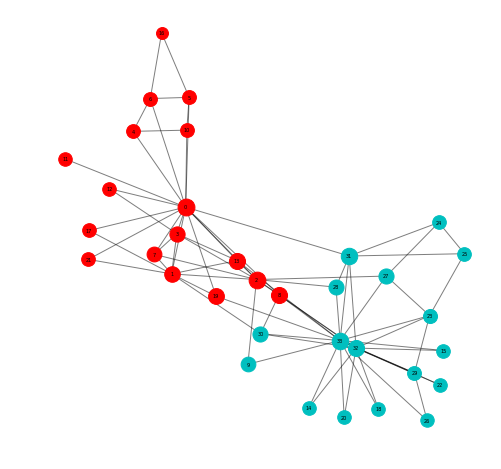

In [5]:
nodes = G.nodes(data = True)

clubs = np.unique([ data['club'] for n, data in nodes ])

plt.figure(figsize=(8, 8))

layout = nx.spring_layout(G)

colors = [ 'r', 'c' ]
for i, club in enumerate(clubs):
    color = colors[i]
    
    nodes_for_club = [ (n, data) for n, data in nodes if data['club'] == club ]
    
    for key, nodes_in_club in itertools.groupby(sorted(nodes_for_club, key=lambda x: x[1]['cc']), key=lambda x: x[1]['cc']):
        nodelist = [ n[0] for n in nodes_in_club ]
        nx.draw_networkx_nodes(
            G,
            layout,
            nodelist=nodelist,
            node_color=color,
            node_size=key*500)

nx.draw_networkx_labels(G, layout, dict([ (n[0], n[0]) for n in nodes ]), font_size=5)
nx.draw_networkx_edges(G, layout, width=1.0, alpha=0.5)

plt.axis('off')